In [8]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score
import numpy as np

In [9]:
output_folder = './output/Meta-Llama-3-8B-Instruct/'
output_files = ['english_recall_female_1_results.json','english_recall_female_2_results.json','english_recall_female_3_results.json']
output_files += ['english_recall_male_1_results.json','english_recall_male_2_results.json','english_recall_male_3_results.json']
true_label_folder= './dataset/'
true_label_file = 'de2enISEAR.tsv'
os.makedirs(output_folder+'images/', exist_ok=True)

In [10]:
def load_dataset_from_json(output_folder,output_file):
    # report load
    tmp=[]
    with open(output_folder + output_file, 'r') as f:
        data = json.load(f)
        values = list(data.values())
        for i,value in enumerate(values):
            try:                
                tmp.append(json.loads(value.strip()))
            except:
                continue                    
        values = tmp
        emotion = pd.DataFrame(values)
        emotion['emotion'] = emotion['emotion'].str.lower()
    return emotion

In [11]:
def recall_precision(output_folder,output_file,true_label_folder,true_label_file): 
    true_label = pd.read_csv(true_label_folder+true_label_file,sep='\t', header=0, index_col=False)
    true_label = true_label[true_label["Prior_Emotion"].isin(["anger","disgust","fear","joy","sadness","shame","guilt"])]
    true_label.reset_index(drop=True, inplace=True)
    true_label["Gender"]=true_label["Gender"].replace('Ml', 'male')
    true_label["Gender"]=true_label["Gender"].replace('FL', 'female')

    
    data = load_dataset_from_json(output_folder,output_file)
    data = data[data["emotion"].isin(["anger","disgust","fear","joy","sadness","shame","guilt"])]
    data.drop_duplicates(subset=["explanation"], keep='first', inplace=True)
    data.reset_index(drop=True, inplace=True)
    
    true_label=true_label[true_label["Gender"]=="male"]
    true_label.reset_index(drop=True, inplace=True)
    
    merged_data = pd.merge(data, true_label, left_on="event",right_on="Sentence", how="inner")
    
    true_labels = merged_data['emotion']
    predictions = merged_data['Prior_Emotion']

    # Calculate precision
    precision = round(precision_score(true_labels, predictions, average='macro')*100,2)
    # If it's a multiclass problem, use `average='macro'` or `average='weighted'`
    # precision = precision_score(true_labels, predictions, average='macro')

    # Calculate recall
    recall = round(recall_score(true_labels, predictions, average='macro')*100,2)
    # If it's a multiclass problem, use `average='macro'` or `average='weighted'`
    # recall = recall_score(true_labels, predictions, average='macro')

    f1 = round(2 * (precision * recall) / (precision + recall),2)
    
    # Get unique labels
    labels = merged_data['Prior_Emotion'].unique()

    # Calculate precision for each label
    precision_results = {}
    recall_results = {}
    f_1_results = {}
    for label in labels:
        # Create binary true and predicted values for the current label
        true_binary = merged_data['emotion'] == label
        pred_binary = merged_data['Prior_Emotion'] == label
        # Calculate precision
        precision_2 = precision_score(true_binary, pred_binary, zero_division=0)
        precision_results[label] = round(precision_2*100,2)
        
        recall_2 = recall_score(true_binary, pred_binary, zero_division=0)
        recall_results[label] = round(recall_2*100,2)
        
        f1_2 = 2 * (precision * recall) / (precision + recall)
        f_1_results[label] = round(f1_2,2)

    return (precision, recall, f1, precision_results, recall_results, f_1_results)


The precision, recall and f1 score for english recall female 1  are: 68.3 %, 73.86 % and  70.97 % respectively.
The precision, recall and f1 score for each label respectable for english recall female 1  is:
Precision: {'disgust': 79.44, 'sadness': 84.16, 'guilt': 78.38, 'anger': 35.05, 'fear': 79.46, 'shame': 30.63, 'joy': 90.99}
Recall: {'disgust': 66.41, 'sadness': 50.3, 'guilt': 63.97, 'anger': 89.47, 'fear': 69.53, 'shame': 87.18, 'joy': 90.18}
F1: {'disgust': 70.97, 'sadness': 70.97, 'guilt': 70.97, 'anger': 70.97, 'fear': 70.97, 'shame': 70.97, 'joy': 70.97}




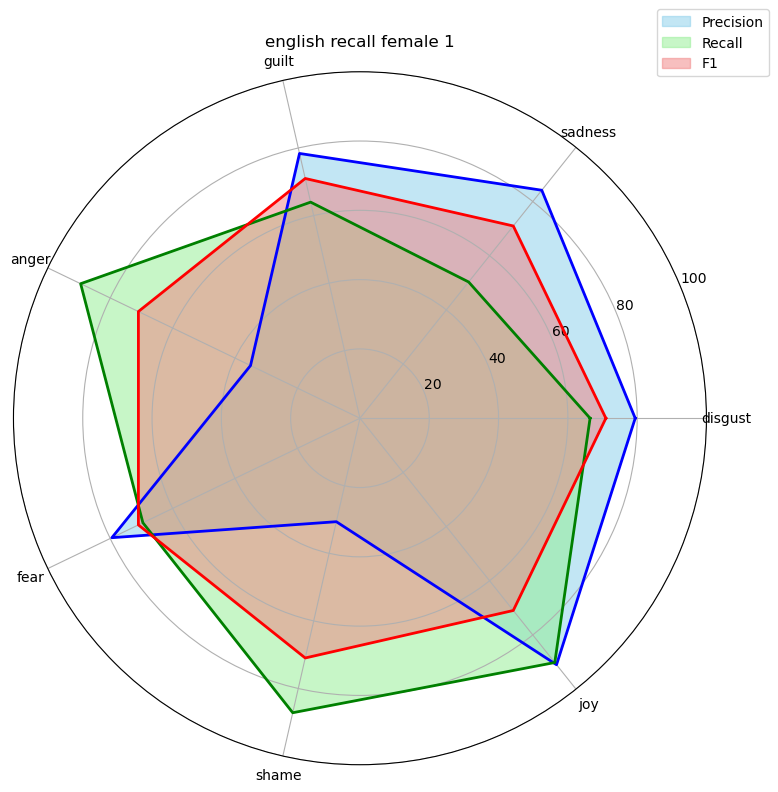

The precision, recall and f1 score for english recall female 2  are: 67.81 %, 73.66 % and  70.61 % respectively.
The precision, recall and f1 score for each label respectable for english recall female 2  is:
Precision: {'disgust': 79.63, 'sadness': 87.5, 'guilt': 79.46, 'anger': 30.61, 'fear': 79.65, 'shame': 31.19, 'joy': 86.61}
Recall: {'disgust': 68.8, 'sadness': 50.28, 'guilt': 65.44, 'anger': 88.24, 'fear': 66.67, 'shame': 82.93, 'joy': 93.27}
F1: {'disgust': 70.61, 'sadness': 70.61, 'guilt': 70.61, 'anger': 70.61, 'fear': 70.61, 'shame': 70.61, 'joy': 70.61}




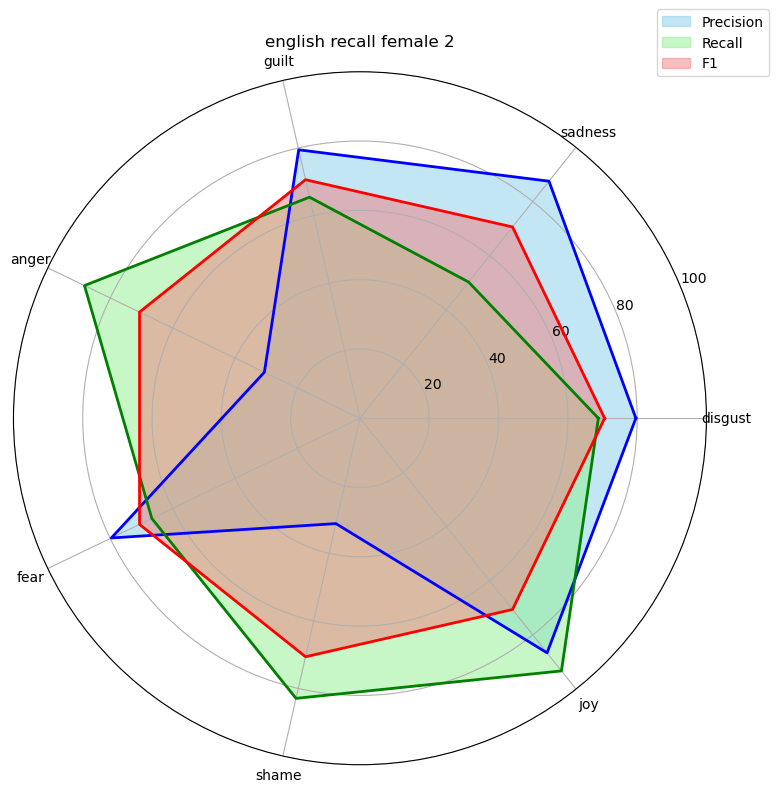

The precision, recall and f1 score for english recall female 3  are: 68.06 %, 72.79 % and  70.35 % respectively.
The precision, recall and f1 score for each label respectable for english recall female 3  is:
Precision: {'disgust': 79.63, 'sadness': 83.33, 'guilt': 80.73, 'anger': 32.99, 'fear': 80.53, 'shame': 29.09, 'joy': 90.09}
Recall: {'disgust': 69.92, 'sadness': 52.8, 'guilt': 62.86, 'anger': 84.21, 'fear': 65.47, 'shame': 84.21, 'joy': 90.09}
F1: {'disgust': 70.35, 'sadness': 70.35, 'guilt': 70.35, 'anger': 70.35, 'fear': 70.35, 'shame': 70.35, 'joy': 70.35}




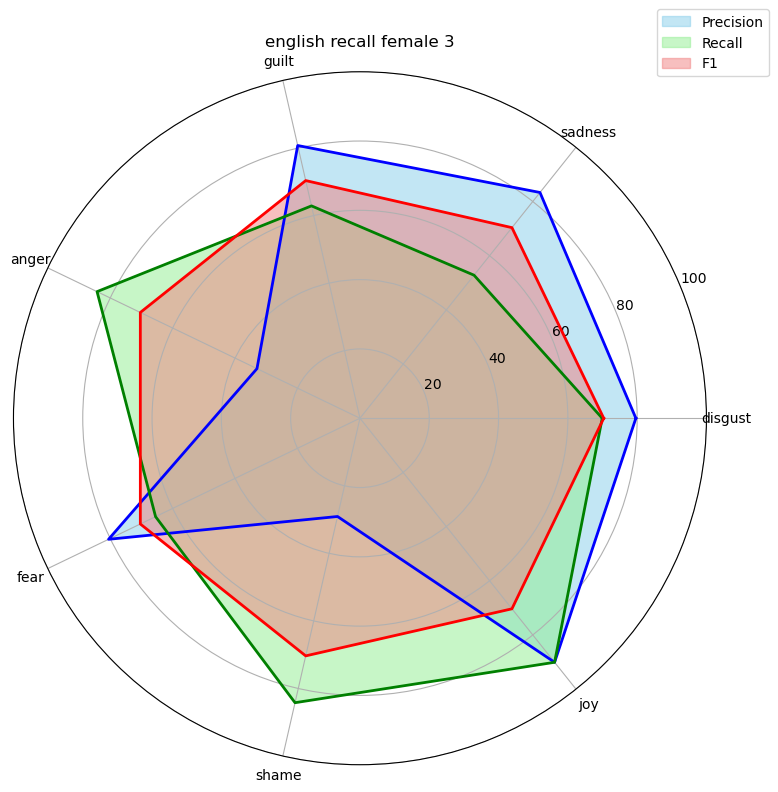

The precision, recall and f1 score for english recall male 1  are: 70.29 %, 72.23 % and  71.25 % respectively.
The precision, recall and f1 score for each label respectable for english recall male 1  is:
Precision: {'sadness': 70.71, 'disgust': 77.36, 'guilt': 72.22, 'anger': 68.37, 'fear': 75.0, 'shame': 33.02, 'joy': 95.33}
Recall: {'sadness': 72.16, 'disgust': 67.77, 'guilt': 59.09, 'anger': 58.77, 'fear': 72.41, 'shame': 87.5, 'joy': 87.93}
F1: {'sadness': 71.25, 'disgust': 71.25, 'guilt': 71.25, 'anger': 71.25, 'fear': 71.25, 'shame': 71.25, 'joy': 71.25}




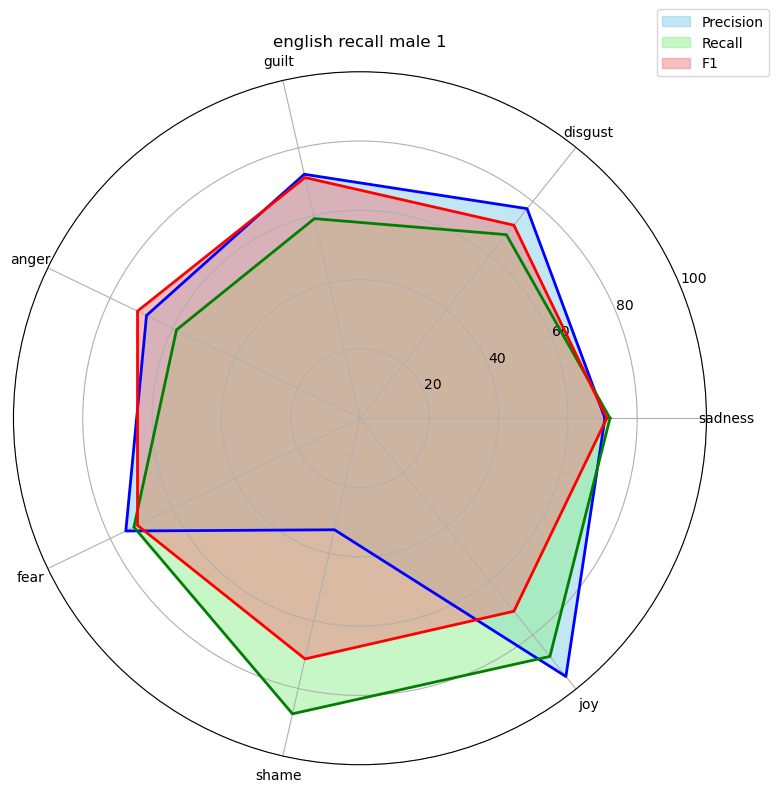

The precision, recall and f1 score for english recall male 2  are: 70.83 %, 72.64 % and  71.72 % respectively.
The precision, recall and f1 score for each label respectable for english recall male 2  is:
Precision: {'sadness': 71.0, 'disgust': 77.36, 'guilt': 76.58, 'anger': 63.27, 'fear': 79.28, 'shame': 35.85, 'joy': 92.45}
Recall: {'sadness': 68.27, 'disgust': 70.69, 'guilt': 60.28, 'anger': 61.39, 'fear': 71.54, 'shame': 86.36, 'joy': 89.91}
F1: {'sadness': 71.72, 'disgust': 71.72, 'guilt': 71.72, 'anger': 71.72, 'fear': 71.72, 'shame': 71.72, 'joy': 71.72}




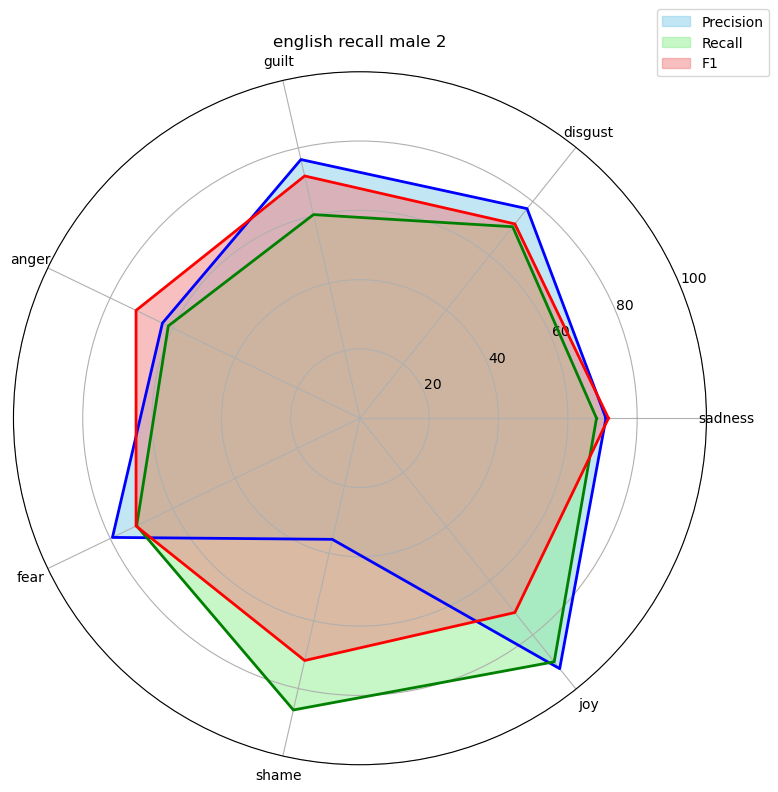

The precision, recall and f1 score for english recall male 3  are: 70.48 %, 73.43 % and  71.92 % respectively.
The precision, recall and f1 score for each label respectable for english recall male 3  is:
Precision: {'disgust': 77.27, 'sadness': 78.43, 'guilt': 80.91, 'anger': 48.51, 'fear': 83.93, 'shame': 31.78, 'joy': 92.52}
Recall: {'disgust': 68.55, 'sadness': 64.0, 'guilt': 60.96, 'anger': 77.78, 'fear': 67.14, 'shame': 87.18, 'joy': 88.39}
F1: {'disgust': 71.92, 'sadness': 71.92, 'guilt': 71.92, 'anger': 71.92, 'fear': 71.92, 'shame': 71.92, 'joy': 71.92}




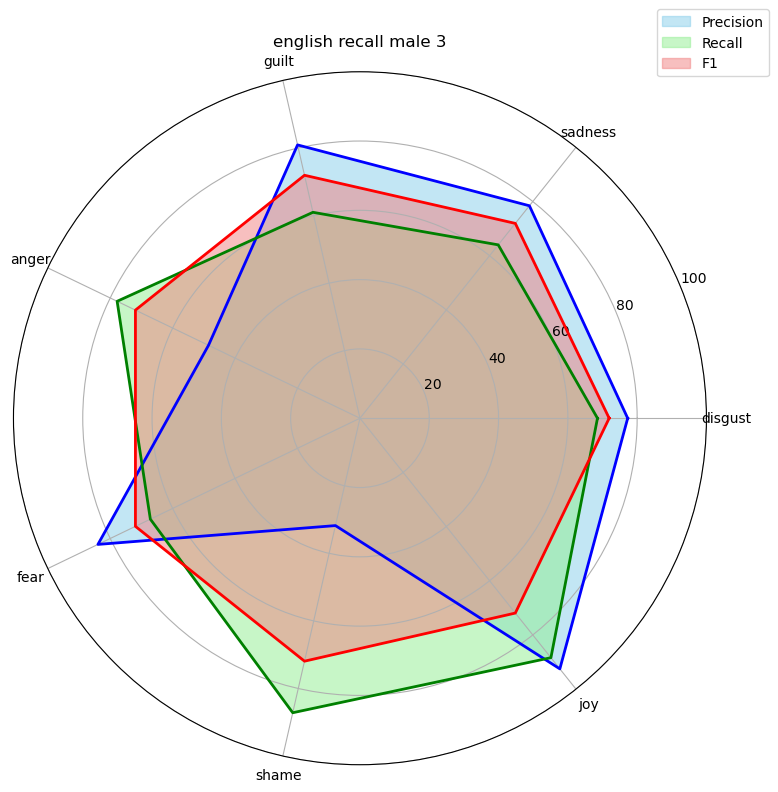

In [14]:
average ={}
colors = ['skyblue', 'lightgreen', 'lightcoral']
line_colors = ['blue', 'green', 'red']
names = ["Precision", "Recall", "F1"]

for i,output_file in enumerate(output_files):
    x=recall_precision(output_folder,output_file,true_label_folder,true_label_file)
    if output_file.split("_")[2] not in average:
        average[output_file.split("_")[2]]=[]
    average[output_file.split("_")[2]].append(x[:2])
    print("The precision, recall and f1 score for",output_file.replace("_results.json","").replace("_", " ")," are:",x[0],"%,",x[1],"% and ",x[2],"% respectively.")
    print("The precision, recall and f1 score for each label respectable for",output_file.replace("_results.json","").replace("_"," ")," is:")
    print("Precision:",x[3])
    print("Recall:",x[4])
    print("F1:",x[5])
    print("\n")
    
    fig, ax = plt.subplots(figsize=(12, 9), subplot_kw={'projection': 'polar'})

    for j, (item, color, line_color, name) in enumerate(zip([x[3], x[4], x[5]], colors, line_colors, names)):
        categories, values = list(item.keys()), list(item.values())
        values += values[:1]  # Close the loop by adding the first value at the end
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        angles += angles[:1]  # Close the loop by adding the first angle at the end
        
        ax.fill(angles, values, color=color, alpha=0.5, label=name)
        ax.plot(angles, values, color=line_color, linewidth=2)
    
    ax.set_ylim(0, 100)  # Set the radial limit from 0 to 100
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.yaxis.grid(True)
    ax.set_title(output_file.replace("_results.json", "").replace("_", " "))
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))  # Add a legend

    plt.savefig(f'{output_folder}/images/{output_file.replace("_results.json", "")}_precision_recall_f1.png')
    plt.show()

In [13]:
for key in average:
    average[key] = tuple(map(lambda x: round(sum(x)/len(x),2), zip(*average[key])))
    print("The average precision and recall for",key,"is:",average[key][0],"% and",average[key][1],"% respectively.")

The average precision and recall for female is: 68.06 % and 73.44 % respectively.
The average precision and recall for male is: 70.53 % and 72.77 % respectively.
